# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 3

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **20 марта в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

**Работа Закировой Марфы, студентки третьего курса ФБМФ, Б06-907**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

*Замечания.* Решения теоретических пунктов можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab.

Фотографии принимаются только в хорошем качестве, следите за освещением и почерком. На фотографиях также указывайте номера задач.

### Задача 1. Несмещенность оценок.

**Теория**

Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим статистику $S^2=\frac1n\sum\limits_{i=1}^n(X_i-\overline{X})^2$.

a). Докажите, что статистика $S^2$ равна $\overline{X^2}-\overline{X}^2$ и является состоятельной оценкой $\sigma^2$;

b). Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

c*). Докажите, что если конечны первые четыре момента ( $\mathsf{E}X, \mathsf{E}X^2, \mathsf{E}X^3, \mathsf{E}X^4$) распределения  $\mathsf{P}$, то статистика $S^2$ является асимптотически нормальной оценкой $\sigma^2$ и найдите ее асимптотическую дисперсию.
        

**Ответ:**
**а)** $$S_n^2 = \frac{1}{n}\sum_{i=1}^{n}{(X_i - \bar{X})^2} =  \frac{1}{n}\sum_{i=1}^{n}{((X_i)^2 - 2X_i\cdot\bar{X}+(\bar{X})^2)}=$$

$$=(\bar{X})^2 - 2 (\bar{X})^2 + \frac{1}{n}\sum_{i=1}^{n}{X_i^2} = \bar{X^2}- (\bar{X})^2 $$

**б) Заметим что статистика является состоятельной оценкой $\sigma^2$:** \\

$$S_n^2 =\frac{1}{n}\sum_{i=1}^{n}{(X_i - \frac{1}{n}\sum_{i=1}^{n}{X_i}})^2 $$
$$ES_n^2 = \frac{1}{n}\sum_{i=1}^{n}{E(X_i^2 - \frac{2}{n}X_i\cdot\sum_{j = 1}^n X_j} + \frac{1}{n^2}(X_1^2+\dots+X_n^2+\sum_{j_1 != j_2}X_{j_1}\cdot X_{j_2}))=$$
$$ =  \frac{1}{n}\sum_{i=1}^{n}{EX_i^2 -\frac{2}{n} E(X_i X_1+ X_i X_2+\dots+X_i X_n)} +\frac{E}{n^2}(X_1^2+\dots+X_n^2+\sum_{j_1 != j_2}X_{j_1}\cdot X_{j_2})$$
$X_i \text{ независимы }\Rightarrow E(X_i \cdot X_j) = EX_i \cdot EX_j$
$$ES_n^2 = \frac{1}{n}\sum_{i=1}^n{EX_i^2 - \frac{2}{n}((n-1)(EX_i)^2 + E(X_i^2))+\frac{1}{n}E(X_i)^2 +\frac{n-1}{n}\cdot(EX_i)^2} =$$
$$= \frac{n-1}{n}(EX_i^2 - (EX_i)^2) = \frac{n-1}{n}DX_i \rightarrow DX_i = \sigma^2 \text{ при } n\rightarrow \infty$$




**b) При этом не является несмещенной:** \\
$$ES_n^2 = \frac{n-1}{n}DX_i \neq DX_i =\sigma^2 $$

**Практика** 

Пусть теперь $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$.

Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными? Поясните свой ответ. 

**Ответ: Из выкладок выше ясно что S^2 не является несмещенной оценкой по определению. При этом оценка:**
$$S_n^2 = \frac{n}{n-1}S^2= \frac{1}{n-1}\sum_{i=1}^n(X_i - \frac{1}{n}\sum_{i=1}^n{X_i)^2}$$
**несмещенной является**

Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, 1)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее *этих оценок* $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1) координаты для двух различных типов оценок ($S^2, \frac{n}{n-1}S^2$).

* Повторите действие четыре раза для $n \in \{5, 10, 100, 500\}$. В итоге получится четыре графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте данный шаблон для визуализации значений:

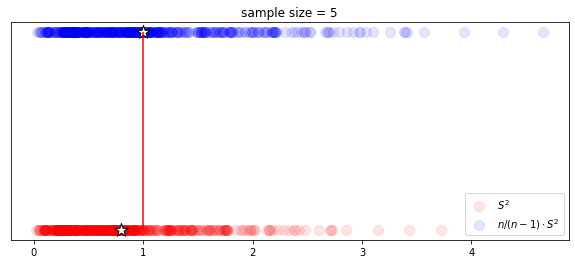

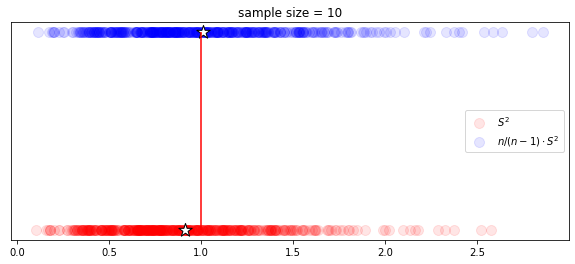

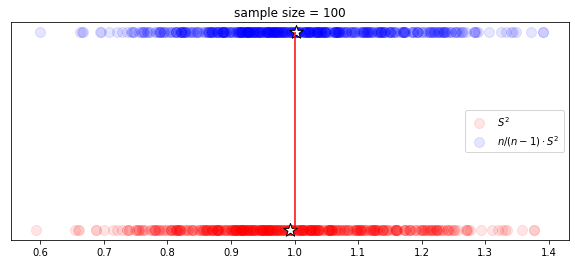

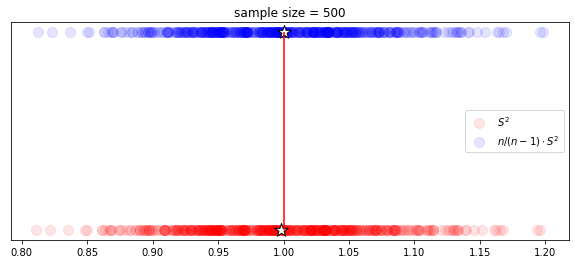

In [101]:
sizes = [5, 10, 100, 500] #размер выборки
samples_count = 500 # количество выборок
for size in sizes:
  sample = np.array([[sps.norm.rvs() for i in range(size)] for j in range(samples_count)])
  theta1 = np.array([(1/size)*sum((sample[i]-np.mean(sample[i]))**2) for i in range(samples_count)])
  theta2 = theta1 * size/(size - 1)
  theta1_mean = np.mean(theta1)
  theta2_mean = np.mean(theta2)

  plt.figure(figsize = (10,4))
  plt.scatter(theta1, np.zeros(samples_count), 
              alpha=0.1, s=100, color='r', label='$S^2$')
  plt.scatter(theta2, np.zeros(samples_count) + 1, 
              alpha=0.1, s=100, color='b', label='$n/(n-1)\cdot S^2$')
  plt.scatter([theta1_mean, theta2_mean], [0,1], marker='*', s=200, 
              color='w', edgecolors='black')
  # Для всего графика:
  plt.vlines(1, 0, 1, color='r')
  plt.title('sample size = %d' % size)
  plt.yticks([])
  plt.legend()



**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

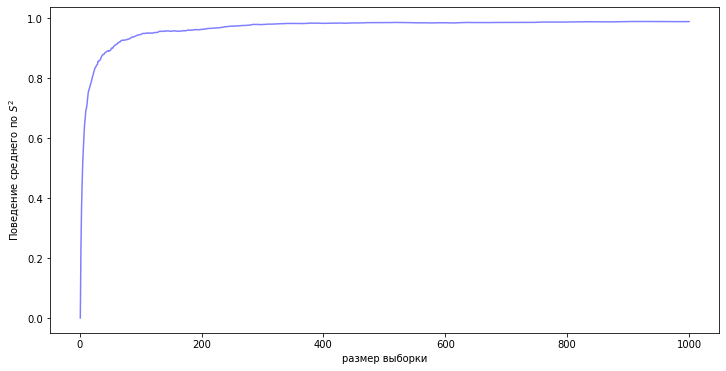

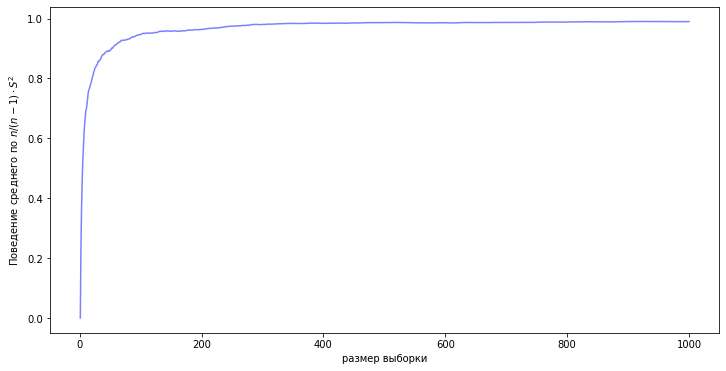

In [105]:
size = 1000
samples_count = 500
sample = sps.norm.rvs(size = (samples_count,size))
len = np.arange(1, size+1)
mean = sample.cumsum(axis = 1)/len
theta1 = ((sample-mean)**2).cumsum(axis = 1)/len
theta2 = theta1 * size/(size - 1)
theta1_mean = theta1.sum(axis = 0)/samples_count
theta2_mean = theta2.sum(axis = 0)/samples_count

plt.figure(figsize=(12,6))
plt.plot(len, theta1_mean, alpha=0.5, color='blue')
plt.ylabel('Поведение среднего по $S^2$')
plt.xlabel('размер выборки')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(len, theta2_mean, alpha=0.5, color='blue')
plt.ylabel('Поведение среднего по $ n/(n-1)\cdot S^2$')
plt.xlabel('размер выборки')
plt.show()




**Заметно что предел при росте размера выборки для $S^2$ и $\frac{1}{n-1}S^2$ одинаков и равен 1, что подтверждается аналитичеcки:**
$$\frac{n-1}{n}DX_i \rightarrow DX_i = \sigma^2 = 1 \text{ при } n\rightarrow \infty$$

**Обе оценки являются асимптотически несмещенными.**

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 
**Таким образом с увеличением размера выборки оценки дисперсии приближают теоретическую точнее. При этом несмещенность говорит о том, что в среднем попадаем в нужный параметр, в пункте 1) это более отчетливо видно: c увеличением размера выборки каждая из оценок лучше приближает дисперсию, но если $S^2$ попадает в некоторую $\varepsilon$-окрестность $\sigma^2$, то $\frac{1}{n-1}S^2$ попадает ближе и при меньших размерах выборки**

**В лабораторных количество измерений невелико: пользоваться асимптотическими оценками нельзя. Для более точной оценки $\sigma^2$ требуется пользоваться несмещенными оценками $\Rightarrow$ в оценке погрешности используют (n-1) в знаменателе, а не n**


### Задача 2. Гамма-излучение.

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить подписи к графику.

**Решение:**

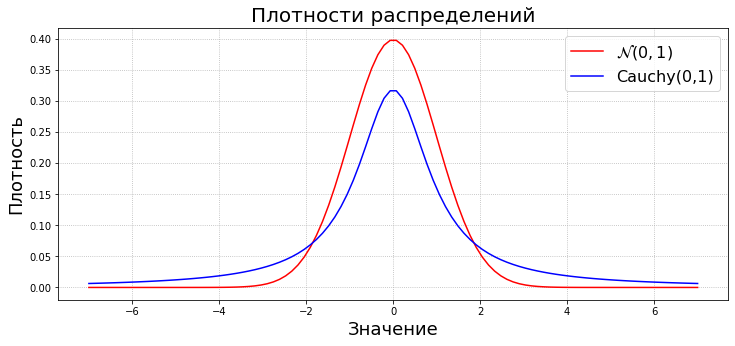

In [108]:
grid = np.linspace(-7, 7, 100)
norm = sps.norm(loc=0, scale=1).pdf(grid)
cauchy = sps.cauchy(loc = 0, scale = 1).pdf(grid)

plt.figure(figsize=(12, 5))
plt.plot(grid, norm, color = 'r', label = '$\\mathcal{N}(0,1)$')
plt.plot(grid, cauchy, color = 'b', label = 'Cauchy(0,1)')
plt.legend(fontsize=16)
plt.title('Плотности распределений', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()


**Вывод:** 
**Пик графика плотности Коши хоть и уже, но он ниже и спадает медленнее, тяжело приближенно оценить область наибольшей концентрации точек квантов. При этом для нормального известно, что большая часть его значений лежит в пределах $\pm 3\sigma$**

**2.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши ($\theta = 0$). Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- Oдношаговая оценка, построенная по выборочной медиане (см. лекцию 4). 

В случае выборочной медианы можно использовать цикл по подвыборкам.

На одном графике изобразите зависимость значений этих оценок от $n$.
Сравните асимптотические дисперсии оценок (для тех оценок, для которых они существуют). Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие (мало отличающиеся от оцениваемого параметра), то есть этот график будует иметь меньший масштаб по оси $y$.

**Решение:**

In [170]:
size = 1000
grid_ = np.arange(1,size + 1)
sample = sps.cauchy(loc = 0, scale = 1).rvs(size=size)
means = np.cumsum(sample)/grid_
medi = np.array([])
for i in grid_:
  medi = np.append(medi,np.median(sample[:i]))

theta_1 = np.array([])
for k in grid_:
  delta = sample[:k] - medi[k-1]
  chisl = np.sum(delta/(1 + delta**2))
  znam = np.sum((1 - delta**2)/((1 + delta**2)**2))
  theta_1 = np.append(theta_1, medi[k-1] + chisl/znam)



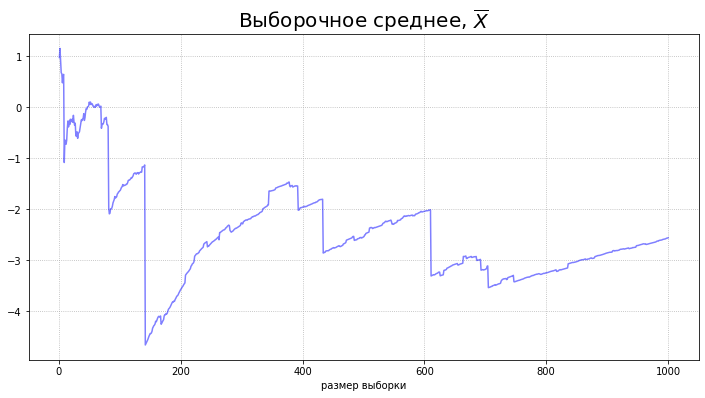

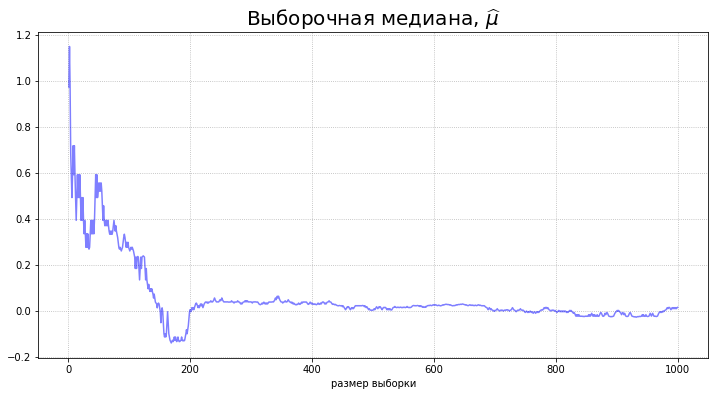

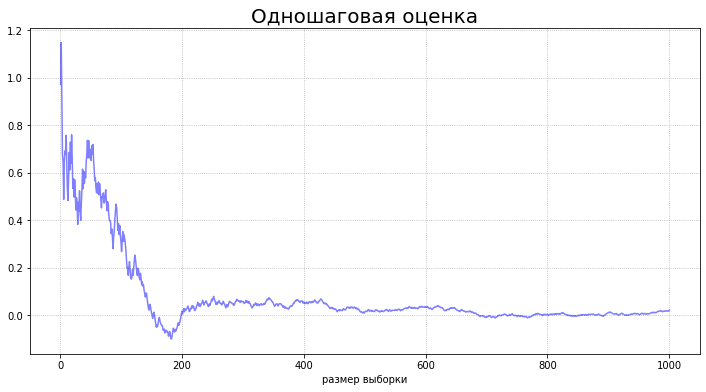

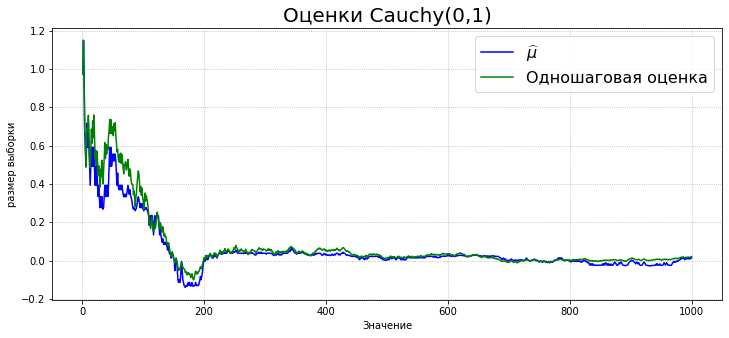

In [179]:
plt.figure(figsize=(12,6))
plt.plot(grid_, means, alpha=0.5, color='blue')
plt.title('Выборочное среднее, $\overline{X}$', fontsize=20)
plt.xlabel('размер выборки')
plt.grid(ls=':')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(grid_, medi, alpha=0.5, color='blue')
plt.title('Выборочная медиана, $\widehat{\mu}$', fontsize=20)
plt.xlabel('размер выборки')
plt.grid(ls=':')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(grid_, theta_1, alpha=0.5, color='blue')
plt.title('Одношаговая оценка', fontsize=20)
plt.xlabel('размер выборки')
plt.grid(ls=':')
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(grid_, medi, color = 'b', label = '$\widehat{\mu}$')
plt.plot(grid_, theta_1,color = 'g', label = 'Одношаговая оценка')
plt.legend(fontsize=16)
plt.title('Оценки Cauchy(0,1)', fontsize=20)
plt.xlabel('Значение')
plt.ylabel('размер выборки')
plt.grid(ls=':')
plt.show()




**Вывод:** 

**Известно, что у распределения Коши нет среднего значения, на первом графике оно и видно, при увеличении размера выборки ни к чему конкретному выборочное среднее не стремится.**

**Медиана распределения является асимптотически нормальной оценкой параметра сдвига $Cauchy(\theta)$. По теореме об асимптотической эффективности, построенная одношаговая оценка, тоже должна быть асимптотически устойчива, что и наблюдается: оба графика при увеличении размера выборки стремятся к 0.**

## Задача 3. Белые мышки.


**Теория**

Пусть $X_1, ... X_n$ &mdash; выборка из распределения $Gamma(\theta, \beta)$ &mdash; гамма-распределение с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $, где $\beta$ фиксировано, а $\Gamma(\beta)$ &mdash; [гамма-функция](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) ;



Найдите 


- 1). оценку максимального правдоподобия $\theta$;

- 2). ее асимптотическую дисперсию, считая выполненными условия теоремы об ОМП. 

**Ответ**

**Практика**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

In [16]:
df = pd.read_csv("./Data_Cortex_Nuclear.csv") 

Выберем для анализа белки ITSN1_N, DYRK1A_N, pBRAF_N, pCREB_N.

In [17]:
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']  

df_chosen_columns = df[columns]

Постройте гистограммы изучаемых признаков.

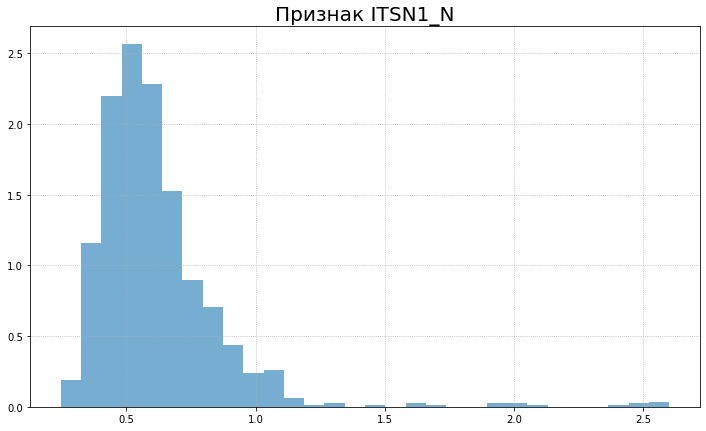

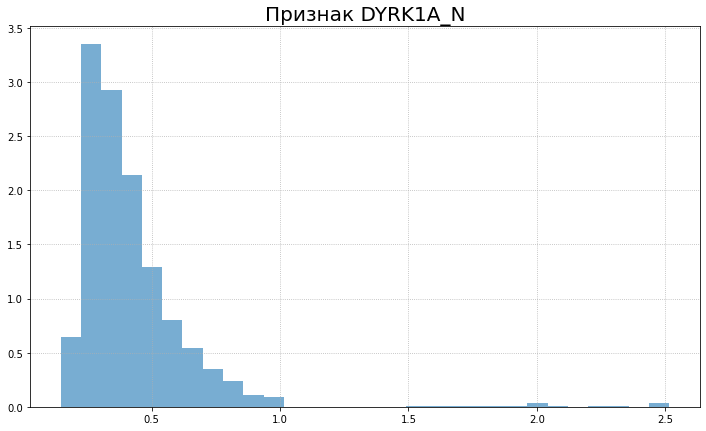

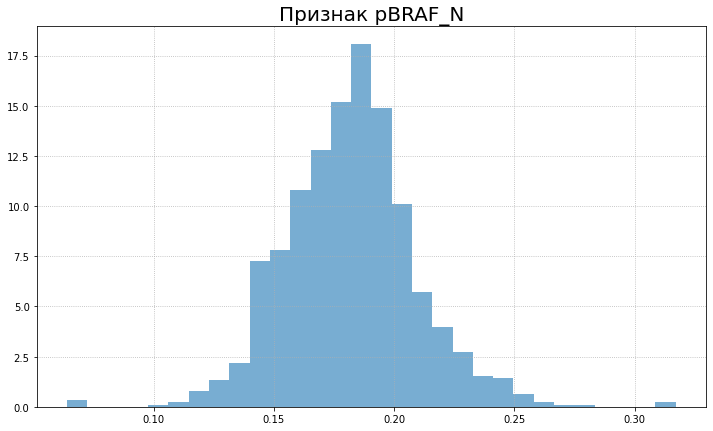

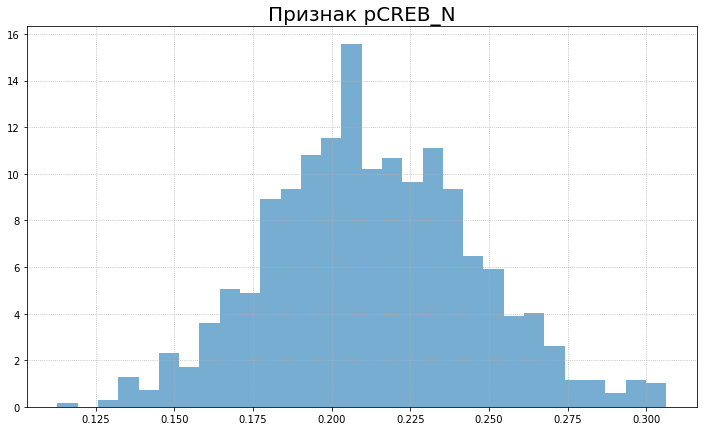

In [6]:
for column in columns:
  plt.figure(figsize=(12, 7))
  plt.hist(df_chosen_columns[column], bins=30, density=True, 
          alpha=0.6) 
  plt.title(r'Признак '+column, fontsize=20)
  plt.grid(ls=':')
  plt.show()

**1.** 

В этой части задания вам предлагается найти оценки максимального правдоподобия (ОМП) по формулам, полученным в теоретической части задания и на семинаре. Вам также поможеет задание из Яндекс.Контеста. Если вам не удалось посчитать теоретически какую-то из нужных ОМП, сделайте хотя бы для той, которую посчитали.

Предположим, что признаки имеют следующие распределения: 


*   'pBRAF_N' и 'pCREB_N' &mdash; нормальное распределение с неизвестными параметрами $\theta = (a, \sigma^2)$;
*  'ITSN1_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 13.5;
* 'DYRK1A_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 9.

Не пугайтесь гамма-распределения, оно тоже часто встречается, как мы и увидим в этой задаче.

*Замечание:* в `scipy.stats` у гамма-распределения параметр `a` означает $\beta$, а параметр `scale` означает $1 / \theta$.


Удалите неопределенные значения `nan` и выбросы и посчитайте ОМП для данных выборок признаков, предполагая, что они имеют указанные выше распределения. Подсчет ОМП оформите в виде функций, принимающих реализацию выборки и $\beta$ в случае гамма-распределения. Выведите полученные значения параметров.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

**Удаляем выбросы на основании известных картин распределений:**

*   **ITSN1_N убираем точки правее 1.3**
*   **pBRAF_N - меньше 0.10, дальше 0.30**
*   **DYRK1A_N -  правее 1.5**



In [31]:
df_chosen_columns = df_chosen_columns.dropna()

df_chosen_columns['ITSN1_N'] = df_chosen_columns['ITSN1_N'][df_chosen_columns['ITSN1_N'] < 1.3]
df_chosen_columns['DYRK1A_N'] = df_chosen_columns['DYRK1A_N'][df_chosen_columns['DYRK1A_N'] < 1.5]
df_chosen_columns['pBRAF_N'] = df_chosen_columns['pBRAF_N'][0.10 < df_chosen_columns['pBRAF_N']]
df_chosen_columns['pBRAF_N'] = df_chosen_columns['pBRAF_N'][df_chosen_columns['pBRAF_N'] <  0.30]

def gamma_mle(x: np.ndarray, beta: float):
  return round(beta/np.mean(x), 3)

def norm_mle(x: np.ndarray):
  a = np.mean(x)
  sigma = np.std(x)
  return (round(a, 3), round(sigma**2, 3))

beta = {'ITSN1_N' : 13.5, 'DYRK1A_N' : 9}
for column in columns:
  if column in ['pBRAF_N', 'pCREB_N']:
    print(f"{column} имеет нормальное распределение с параметрами {norm_mle(df_chosen_columns[column])}")
  if column in beta.keys():
    print(f"{column} имеет гамма - распределение с параметрами {gamma_mle(df_chosen_columns[column], beta[column]), beta[column]}")


ITSN1_N имеет гамма - распределение с параметрами (22.66, 13.5)
DYRK1A_N имеет гамма - распределение с параметрами (22.348, 9)
pBRAF_N имеет нормальное распределение с параметрами (0.182, 0.001)
pCREB_N имеет нормальное распределение с параметрами (0.212, 0.001)


Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но на одной matplotlib-фигуре. Сравните получившиеся результаты. Сделайте выводы.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

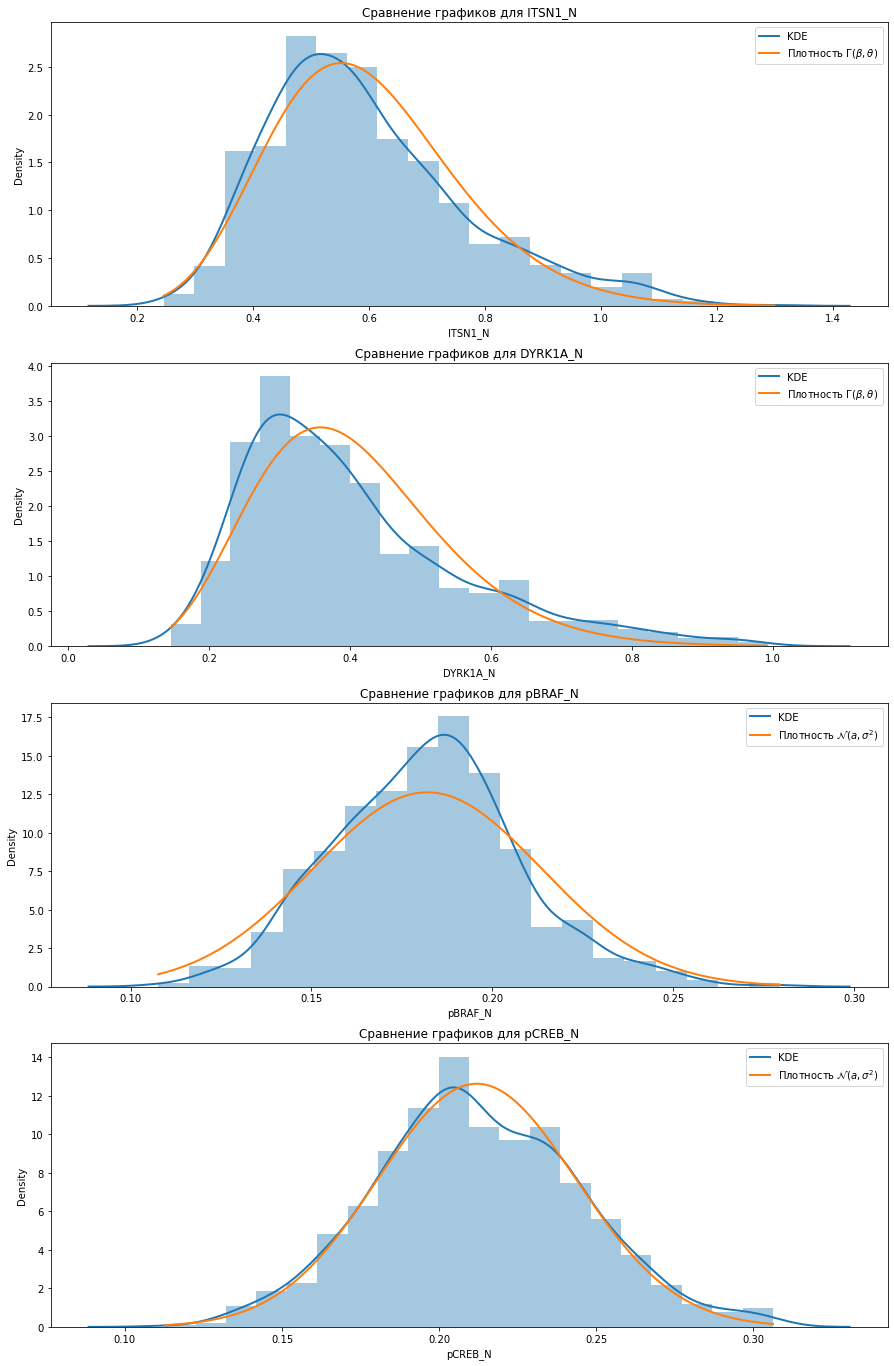

In [39]:

plt.figure(figsize=(15, 24))
for count, column in enumerate(columns):
    grid = np.linspace(np.amin(df_chosen_columns[column]), np.amax(df_chosen_columns[column]), 1000)

    plt.subplot(4,1,count+1)
    sns.distplot(df_chosen_columns[column], bins=20, kde_kws={"label": "KDE", "linewidth": 2})
    if column in beta.keys():
        gamma_val = sps.gamma.pdf(grid, beta[column], 0, 1/gamma_mle(df_chosen_columns[column], beta[column]))
        plt.plot(grid, gamma_val, label='Плотность $\Gamma(\\beta,\\theta)$', lw=2)
    else:
        norm_val = sps.norm.pdf(grid, norm_mle(df_chosen_columns[column])[0], norm_mle(df_chosen_columns[column])[1] ** (1/2))
        plt.plot(grid, norm_val, label='Плотность $\\mathcal{N}(a,\\sigma^2)$', lw=2)
    plt.title('Сравнение графиков для ' + column)
    plt.legend()
plt.show()

**Вывод** \\
**Оценки методом максимального правдоподобия хорошо приближают гистограммы. Ядерные оценки чаще ближе к значениям гистограммы, но часто случайные выбросы смещают KDE отсносительно наиболее близкого распредления.**

**2.**


Реализуйте функции, возвращающие значения функции правдоподобия  и логарифмической функции правдоподобия для гамма распределения с параметрам $\theta, \beta$. Функция принимает реализацию выборки и параметры. Логарифмическую функцию реализуйте с использованием формулы после ее упрощения, а не как взятие функции логарифма от уже вычисленного значения функции правдоподобия.

Для получения частичного балла можно использовать методы `pdf` и `logpdf` для плотности и логарифма плотности распределения в `scipy.stats`, для получения полного балла функции формулу нужно реализовать самостоятельно.

Для подсчета гамма-функции в знаменателе плотности распределения используйте `scipy.special.gamma`, а для подсчета логарифма гамма-функции &mdash; `scipy.special.loggamma`. 



In [42]:
from scipy.special import gamma
def gamma_likelihood(x: np.ndarray, theta: float, beta: float) -> float:
  n = x.shape[0]
  return (((theta ** beta)/ gamma(beta))**n) * (np.prod(x) ** (beta - 1)) * np.exp(-theta * np.sum(x))

def gamma_loglikelihood(x: np.ndarray, theta: float, beta: float) -> float:
  n = x.shape[0]
  return n * (beta * np.log(theta) - (np.log(gamma(beta)))) + (beta - 1) * np.sum(np.log(x)) - (theta * np.sum(x))


Выведите следующие значения:
- функции правдоподобия;
- логарифма, взятого от функции правдоподобия;
- логарифмической функции правдоподобия

на следующих реализациях выборок:
- `np.ones(5)*5` &mdash; 5 пятерок;
- `np.ones(500)*5`&mdash; 500 пятерок;
- `np.ones(5000)*5`&mdash; 5000 пятерок;
- `np.ones(5)*500`.

Параметр $\beta$ положите равным 10, параметр $\theta$ положите равным 2.

Сделайте выводы. Какую функцию лучше вычислять на практике?


In [48]:
import math
znach = pd.DataFrame({"функция правдоподобия":[gamma_likelihood(np.ones(5)*5, 2, 10), 
                                               gamma_likelihood(np.ones(500)*5, 2, 10),
                                               gamma_likelihood(np.ones(5000)*5, 2, 10)],
                       "Логарифм от функции правдоподобия": [math.log(gamma_likelihood(np.ones(5)*5, 2, 10)), 
                                               math.log(gamma_likelihood(np.ones(500)*5, 2, 10)),
                                               math.log(gamma_likelihood(np.ones(5000)*5, 2, 10))],
                        "Логарифмическая функция правдоподобия":[gamma_loglikelihood(np.ones(5)*5, 2, 10), 
                                               gamma_loglikelihood(np.ones(500)*5, 2, 10),
                                               gamma_loglikelihood(np.ones(5000)*5, 2, 10)]})
znach.index = [5,500,5000]
znach

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


,функция правдоподобия,Логарифм от функции правдоподобия,Логарифмическая функция правдоподобия
5,0.000981,-6.927072,-6.927072
500,NaN,NaN,-692.707231
5000,NaN,NaN,-6927.072313


**Вывод** \\
**Видимо значение функции правдоподобия настолько мало, что выдается NaN $\Rightarrow$ для того чтобы не потерять результаты, лучше использоваьт логарифмическую функцию правдоподобия**

**3.** 

Теперь подберем параметр $\beta$ для гамма-распределения с помощью перебора. 

Рассмотрите признаки 'ITSN1_N', 'DYRK1A_N'. В каждом случае сгенерируйте одномерную сетку (grid) и переберите параметр $\beta$ по сетке с шагом $10^{-4}$. Пределы сетки установите сами по смыслу. Вычислите для каждого $\beta$  параметр $\theta$ по теоретической формуле, которую вы реализовали в прошлой части задачи. Посчитайте (логарифмическую) функцию правдоподобия для полученных параметров $\beta, \theta$ и выберите наилучший параметр на основании значений этой функции.  Выведите значения полученных параметров с точностью 4 знака после запятой.

Также постройте графики зависимости значений функций правдоподобия от $\beta$. Сделайте вывод.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

In [52]:
from pandas.core.internals.blocks import CategoricalBlock
ls=[]
maxs=[]
betas=[]
thetas=[]
for count,column in enumerate(columns):   
    if column in beta.keys():
      ls.append([])
      grid = np.linspace(beta[column]-3, beta[column]+3, 60000)
      critical=-1000000
      for elem in grid:
          thet = elem/df_chosen_columns[column].mean()
          log = gamma_loglikelihood(df_chosen_columns[column], thet, elem)
          ls[count].append(log)
          if log>critical:
              critical= log
              beta_= elem
              theta = thet
      maxls.append(critical)
      betas.append(beta_)
      thetas.append(theta)
      print('Для ' + column + ' beta=' + str(beta_) + ', theta=' + str(round(theta, 4)))

Для ITSN1_N beta=12.668636143935732, а theta=21.265
Для DYRK1A_N beta=7.614526908781813, а theta=18.9076


**Вывод**

Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но в одном окне. Сравните получившиеся результаты с результатами, полученным в первой части задачи. Сделайте выводы.

**Вывод**